# Temperature Prerdiction

## Introduction

Weather prediction is an integral part of life, helping us plan ahead and prepare for potential hazards. Machine learning analysis can be used to accurately and dependable predict weather conditions by analyzing large amounts of historical data in order to identify patterns and trends that can be used as guidance when making future forecasts about conditions.

Accurate weather forecasting can have immense economic benefits, particularly for industries such as agriculture, transportation and energy that depend heavily on weather conditions. Accurate predictions help farmers plan their crops, transportation companies optimize routes and energy providers anticipate demand. Furthermore, accurate weather predictions help mitigate natural disasters like hurricanes, floods and wildfires by providing early warnings and allowing authorities to prepare and respond effectively.

Machine learning analysis can also benefit weather modeling, which simulates and predicts atmospheric behavior. By employing machine learning algorithms to detect and correct errors in weather models, forecast accuracy can be greatly enhanced. This, in turn, increases our comprehension of the complex processes driving weather patterns as well as our capacity for making accurate predictions about future climate trends.

Overall, machine learning analysis is an invaluable tool that can be employed to enhance the accuracy and dependability of weather forecasting, offering benefits to individuals, businesses, and society at large.



## Dataset
The datasets of meteorological data come from the meteorological station of the university network of the UNAM Juriquilla Atmospheric Observatory, Queretaro. Data were collected with an interval of one hour, during the month of January to December 2022. In total, there where 12 diferent csv files, each representing a month. For efficency matters, We took the 12 csv and joined them into a single csv that contain all the months of the year.

The units of each data set are:

* Temperature: degrees Fahrenheit
* Solar radiation: watts per meter^2
* Humidity: percentage
* Barometric pressure: Hg
* Wind direction: degrees
* Wind speed: miles per hour

Temperature being our target variable.


    





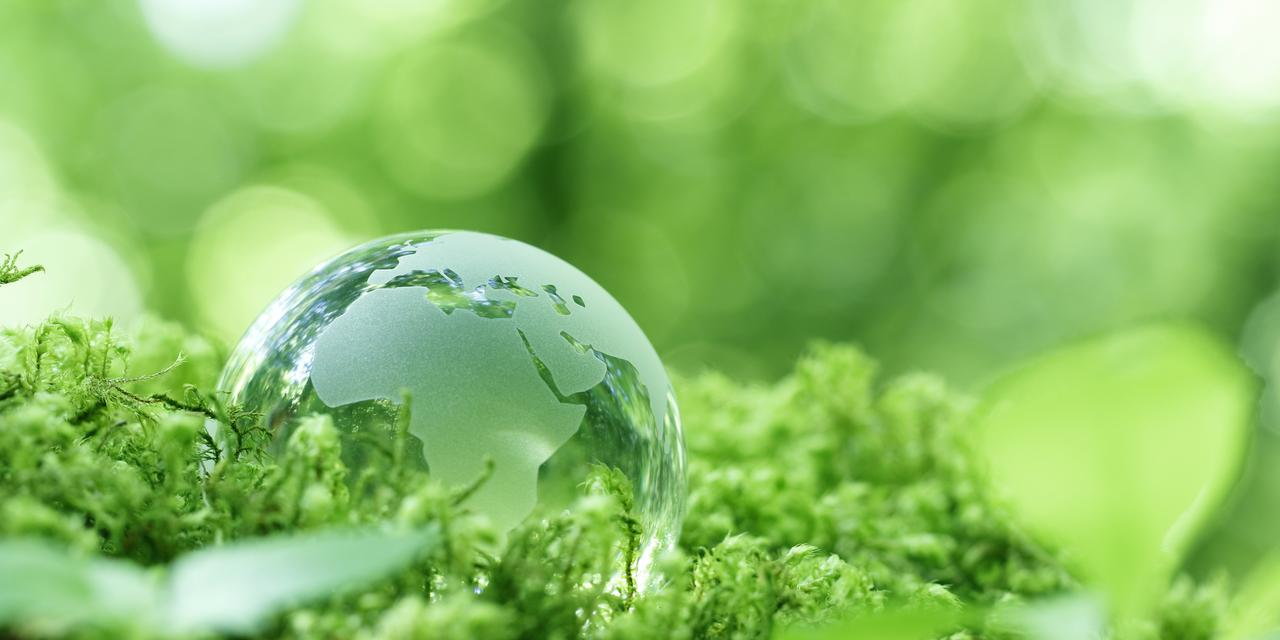

## Data preprocessing
Before applying any machine learning techniques, the input data must be ingested and conditioned.

In [1]:
#pip install -U scikit-learn

In [2]:
#pip install bokeh

In [3]:
import numpy as np 
import pandas as pd 
import pytz 
import io


WeatherQueretaro = pd.read_csv('WeatherQueretaro.csv')

# Rename columns for easier handling
WeatherQueretaro = WeatherQueretaro.rename(columns={
    'TIMESTAMP': 'timestamp',
    'Temp_Avg': 'temp',
    'RH_Avg': 'humidity',
    'WSpeed_Avg': 'wind_speed_avg',
    'WSpeed_Max': 'wind_speed_max',
    'WDir_Avg': 'wind_direction',
    'Press_Avg': 'pressure',
    'Rad_Avg': 'radiation'
})

# Convert timestamp column to datetime type
WeatherQueretaro['timestamp'] = pd.to_datetime(WeatherQueretaro['timestamp'])

# Set timestamp column as index
WeatherQueretaro = WeatherQueretaro.set_index('timestamp')


# Rename dataframe to df
df = WeatherQueretaro

df['temp']     = df['temp'].astype(float)
df['humidity']   = df['humidity'].astype(float)
df['wind_speed_avg']      = df['wind_speed_avg'].astype(float)
df['wind_speed_max']      = df['wind_speed_max'].astype(float)
df['wind_direction'] = df['wind_direction'].astype(float)
df['pressure']     = df['pressure'].astype(float)
df['radiation']     = df['radiation'].astype(float)


df['radiation'] = np.abs(df['radiation'])

units={'radiation':'W/m^2','temp':'C','pressure':'mm Hg','humidity':'\%','wind_speed_max':'km/h'}


In [4]:
print(df.dtypes)

temp              float64
humidity          float64
wind_speed_avg    float64
wind_speed_max    float64
wind_direction    float64
pressure          float64
radiation         float64
dtype: object


In [5]:
#Check for null values
df.isnull().sum()

temp              98
humidity          98
wind_speed_avg    98
wind_speed_max    95
wind_direction    98
pressure          95
radiation         98
dtype: int64

We can't have Null values. Null or missing values in a dataset can create several challenges for machine learning models. Some machine learning algorithms cannot handle missing data, and they may produce errors if null values are present in the data. Additionally, ignoring or deleting samples with missing values can introduce bias and lead to incorrect results, especially if a large proportion of the samples have missing values. Furthermore, missing data can reduce the sample size of the dataset, which can reduce the statistical power of the model and increase the risk of overfitting. Therefore, it is important to handle missing values properly in a dataset. 
So, We will be filling those null values with the mean.

In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
df.isnull().sum()

temp              0
humidity          0
wind_speed_avg    0
wind_speed_max    0
wind_direction    0
pressure          0
radiation         0
dtype: int64

## Data exploration
To visualize the data, plotting libraries can be imported. The Pearson correlations are then calculated to determine the most significant impact of each parameter on the other.

In [8]:
## Libraries
import numpy as np 
from scipy import stats 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="white")

%matplotlib inline

To remove any irrelevant data and to identify the most important features of the ensemble, a basic correlation matrix must be created.

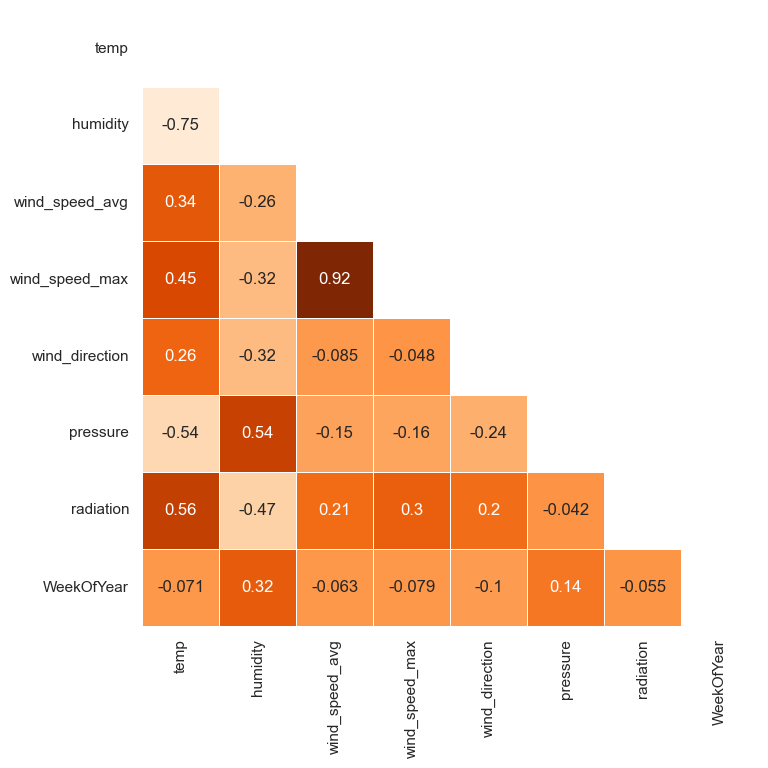

In [9]:
def corrPairs(df):
    corr = df.corr() 
    mask = np.zeros_like(corr, dtype=bool) 
    mask[np.triu_indices_from(mask)] = True 
    fig = sns.heatmap(corr, mask=mask, cmap='Oranges', center=0, square=True, linewidths=.5, annot=True, cbar=False)
    plt.savefig('corrPairs.pdf')

df['WeekOfYear'] = df.index.isocalendar().week # add week
plt.figure(figsize=(8,8))
corrPairs(df)

We can see that Temperature has a strong relationship with radiation and Wind speed. And have a negative relationship between the preassure and humidity.

Examining the strongest correlations more closely:

In [10]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),xy=(.1, .9), xycoords=ax.transAxes, color='white')
    return

def corrMap(df,features):
    g = sns.PairGrid(df, vars=features)
    g.map_upper(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Oranges", shade=True, n_levels=30)
    g.map_lower(corrfunc)
    g.map_lower(corrfunc)

C:\Users\cvler\anaconda3\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\cvler\anaconda3\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, colo

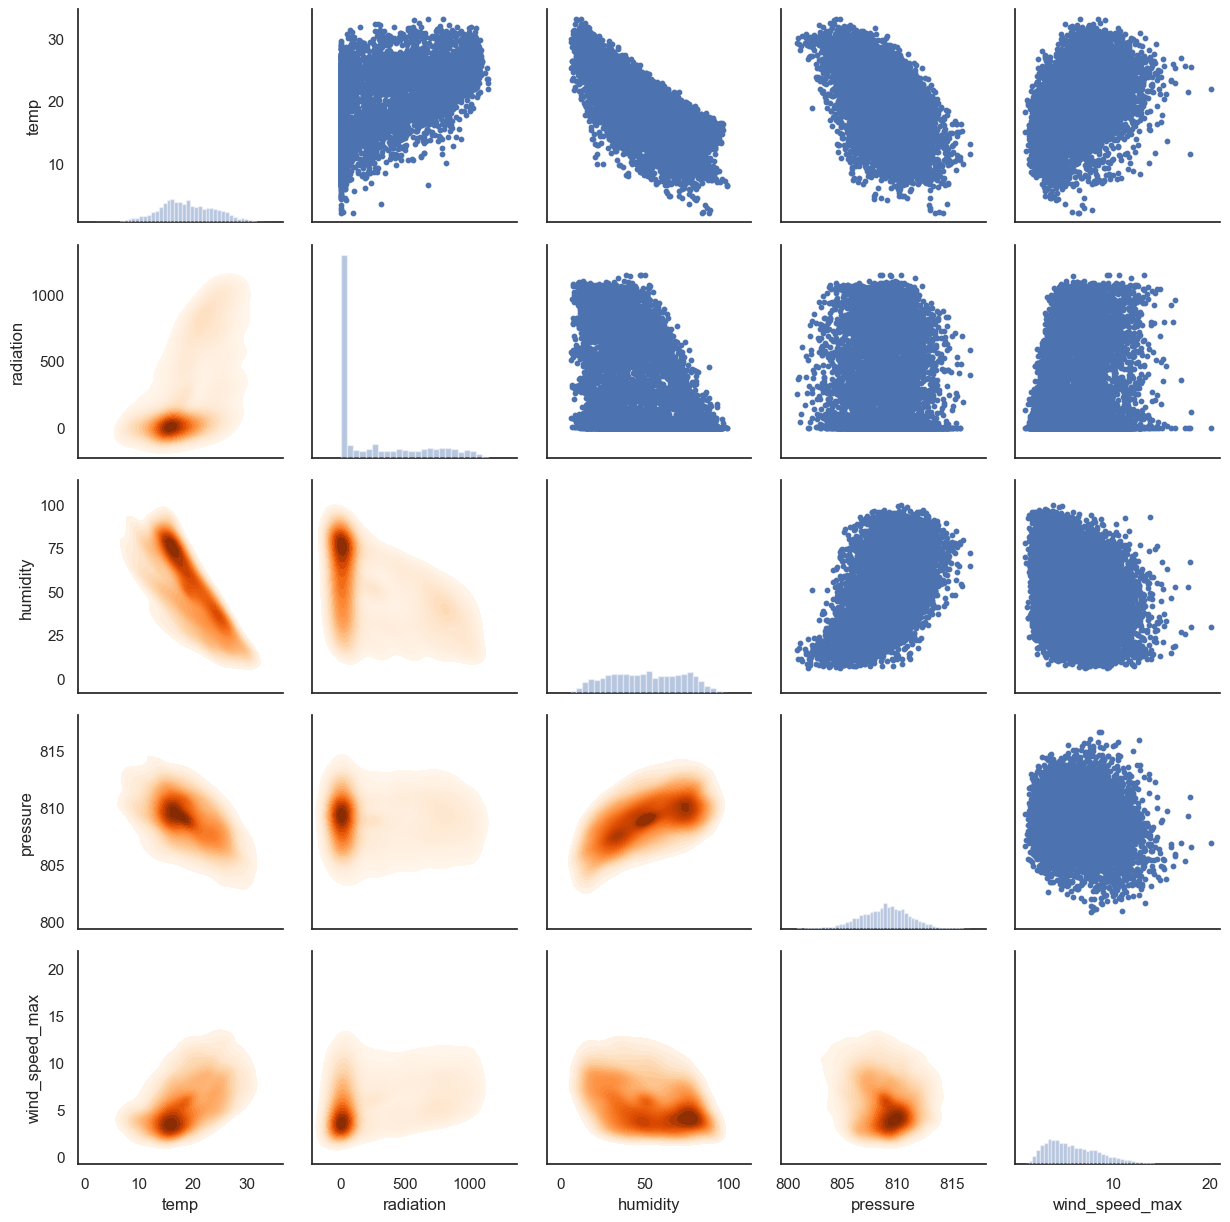

In [11]:
feature_list=['temp','radiation','humidity','pressure','wind_speed_max']
corrMap(df,feature_list)
plt.savefig('corrMap.png')
plt.show()

In [13]:
#Creation of the median dataset
data_median = df.resample('H').median().dropna()

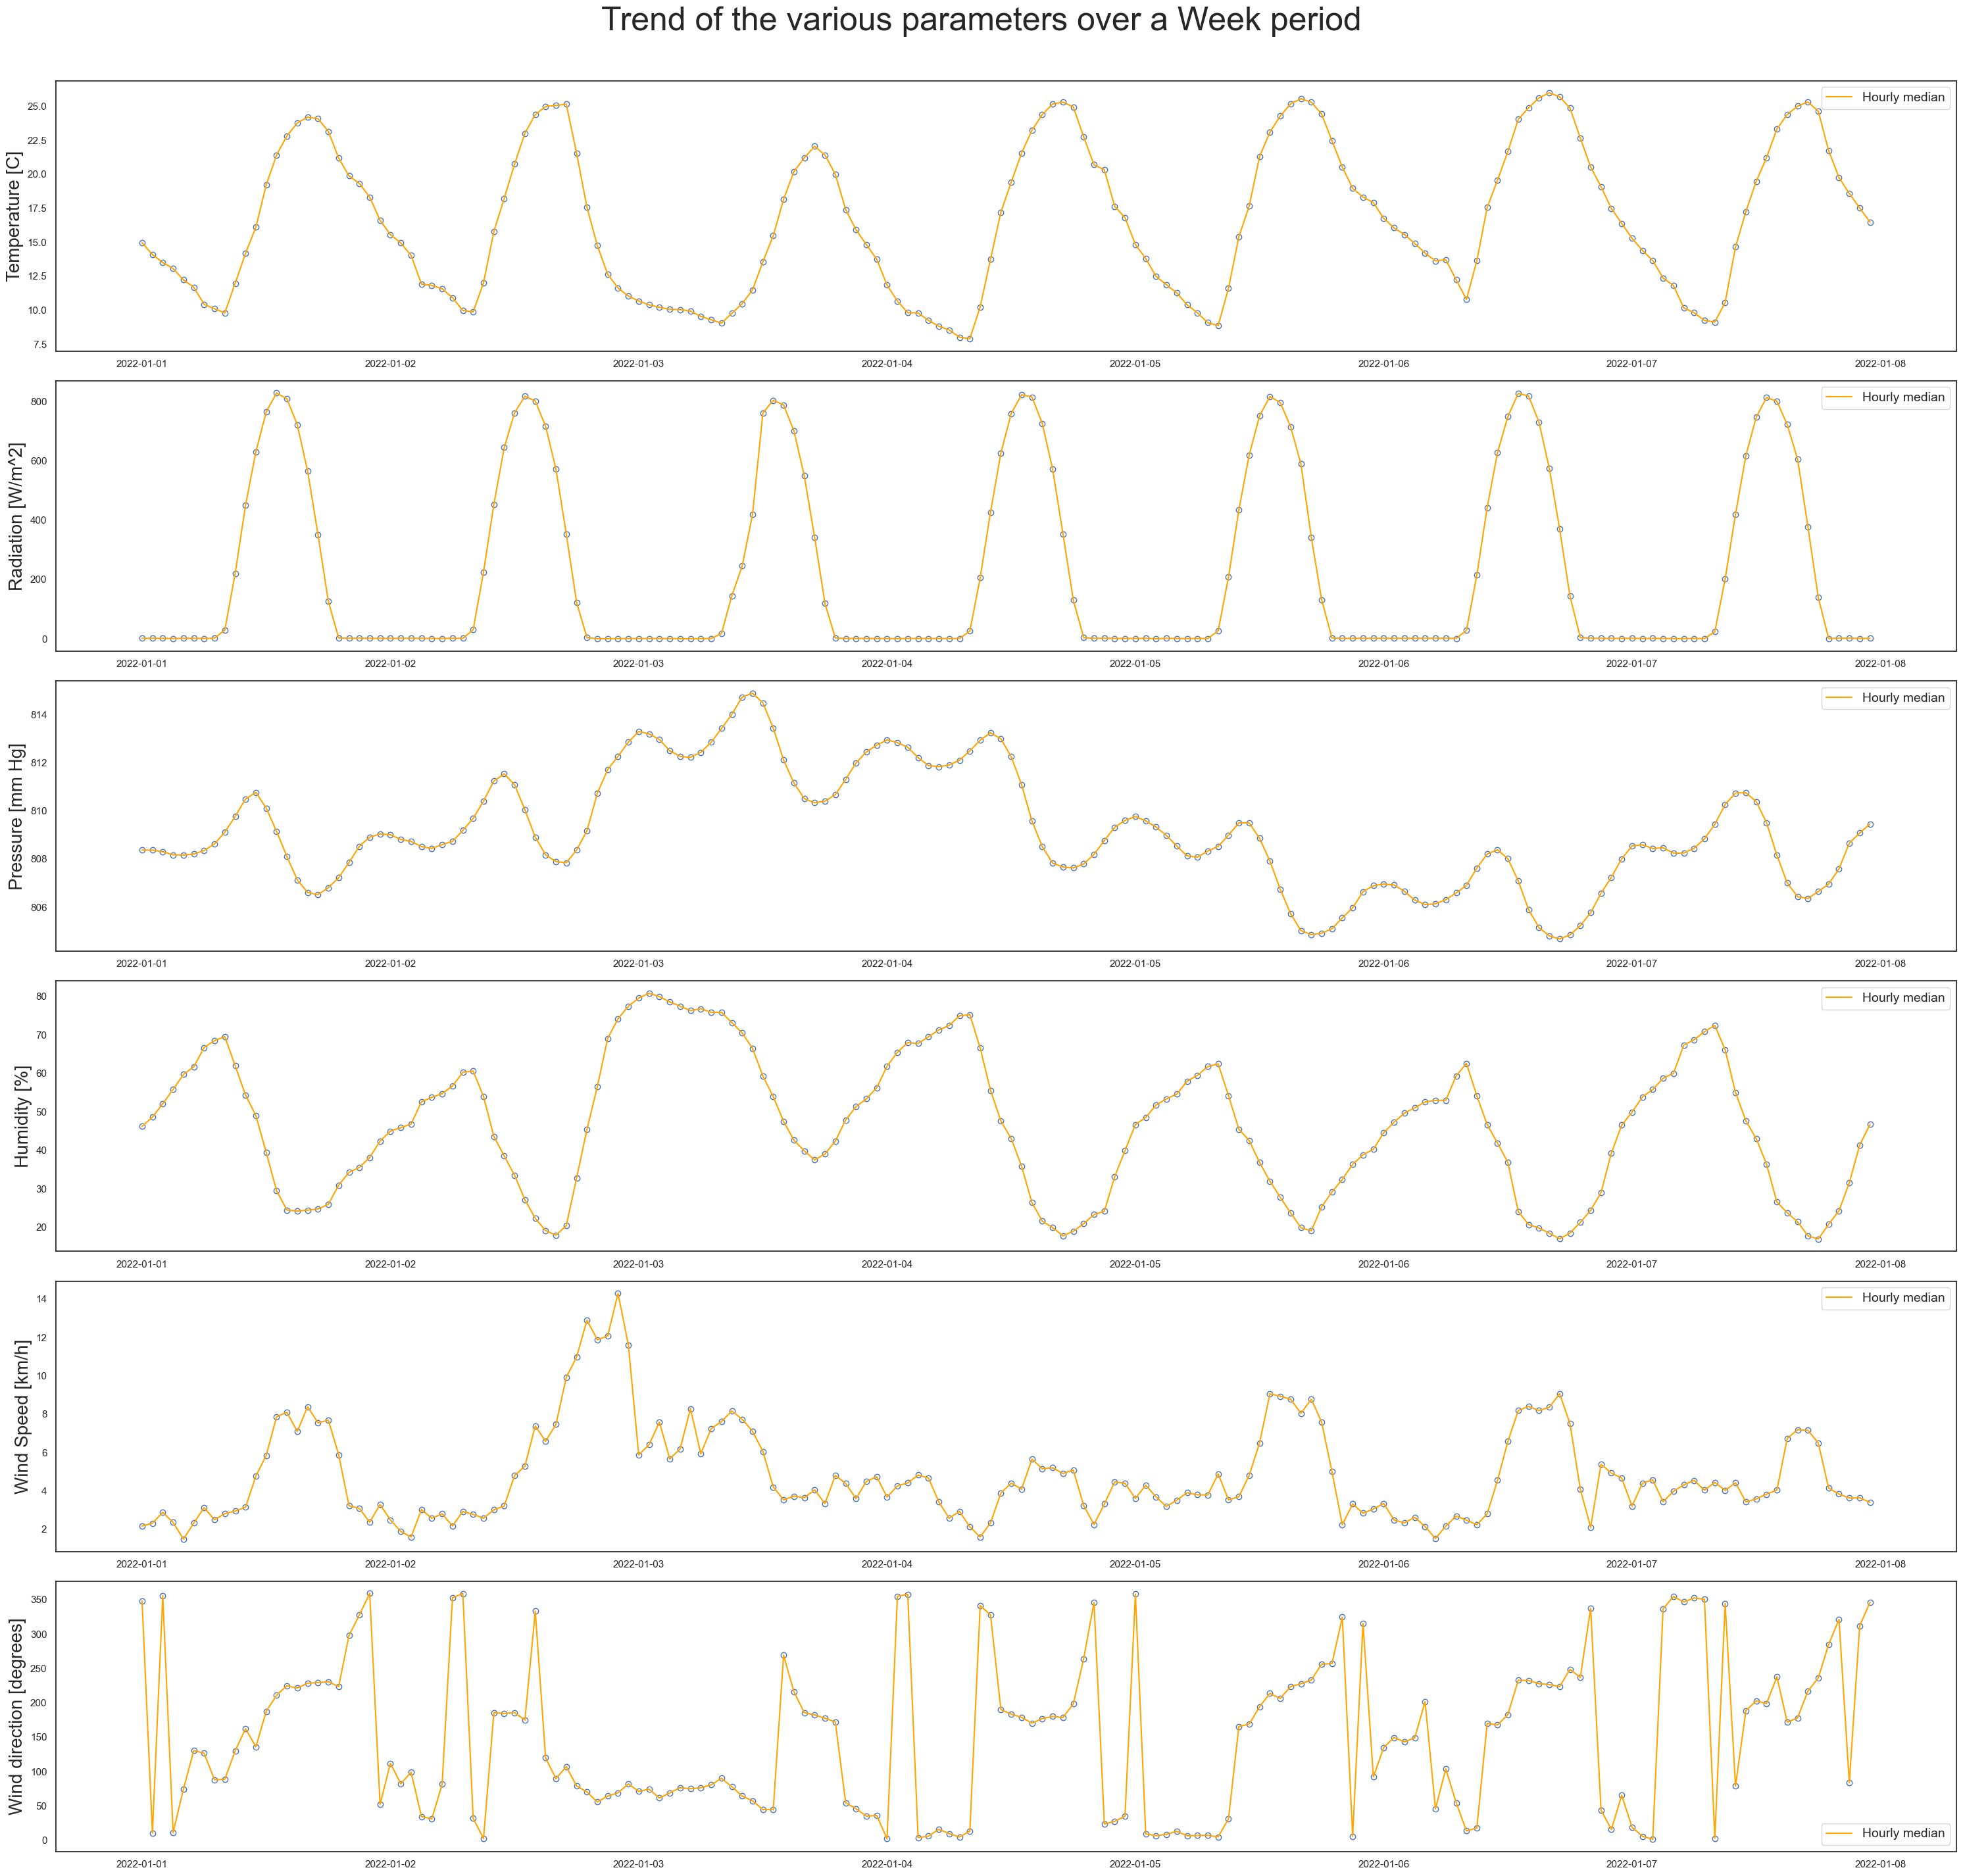

In [14]:
#Extraction of the data for a week period
data_7 = df.loc['2022-01-01':'2022-01-07',:]
data_7_median = data_median.loc['2022-01-01':'2022-01-07',:]


fig, ax = plt.subplots(nrows =6, ncols = 1, figsize = (30,30))


ax[0].plot(data_7.temp,'o', markerfacecolor='w')
ax[0].plot(data_7_median.temp, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[0].set_ylabel('Temperature [C]', fontsize = 20)
ax[0].legend(fontsize = 14)

ax[1].plot(data_7.radiation,'o', markerfacecolor='w')
ax[1].plot(data_7_median.radiation, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[1].set_ylabel('Radiation [W/m^2]', fontsize = 20)
ax[1].legend(fontsize = 14)

ax[2].plot(data_7.pressure,'o', markerfacecolor='w')
ax[2].plot(data_7_median.pressure, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[2].set_ylabel('Pressure [mm Hg]', fontsize = 20)
ax[2].legend(fontsize = 14)

ax[3].plot(data_7.humidity,'o', markerfacecolor='w')
ax[3].plot(data_7_median.humidity, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[3].set_ylabel('Humidity [%]', fontsize = 20)
ax[3].legend(fontsize = 14)

ax[4].plot(data_7.wind_speed_max,'o', markerfacecolor='w')
ax[4].plot(data_7_median.wind_speed_max, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[4].set_ylabel('Wind Speed [km/h]', fontsize = 20)
ax[4].legend(fontsize = 14)

ax[5].plot(data_7.wind_direction,'o', markerfacecolor='w')
ax[5].plot(data_7_median.wind_direction, linewidth = 1.5, color = 'orange', label = 'Hourly median')
ax[5].set_ylabel('Wind direction [degrees]', fontsize = 20)
ax[5].legend(fontsize = 14)

fig.suptitle('Trend of the various parameters over a Week period', fontsize = 36)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.show()

The following can be deduced by looking at the plots:

Data for Temperature, Humidity, and Wind Speed seem to only assume discrete values. The data for pressure seems to have a clear pattern where high and low pressure values interact with each other. The data for wind speed is very volatile. This feature could be less "certain" when performing the regression analysis. The solar radiation data is consistent at zero at night and high variability during the day. The wind direction data can be volatile but clear trends can still be identified.

In [15]:
import matplotlib.pyplot as plt

def color_y_axis(ax, color):
    for t in ax.get_yticklabels():
        t.set_color(color)
    ax.yaxis.label.set_color(color)
    return None

def plotVs(df,timescale,feature1,feature2,ax1,units):
    ax2=ax1.twinx()
    df_grouped= df.groupby(timescale)

    df_feature1 = df_grouped[feature1].mean()
    df_feature1_errorpos =  df_feature1+df_grouped[feature1].std()/2
    df_feature1_errorneg =  df_feature1-df_grouped[feature1].std()/2
    ax1.plot(df_feature1)
    ax1.fill_between(df_feature1.index, df_feature1_errorpos.values, df_feature1_errorneg.values, alpha=0.3, antialiased=True, color='red')
    ax1.set_ylabel(feature1+' '+units[feature1])
    color_y_axis(ax1, 'r')

    if feature2 == 'temp':
        rad = df_grouped['temp'].mean()
        ax2.plot(rad,'orange')
        ax2.fill_between(df_feature1.index, 0, rad, alpha=0.4, antialiased=True, color='orange')
        ax2.set_ylabel('Temperature C'+' '+units['temp'])
        color_y_axis(ax2, 'orange')
    else:
        df_feature2 = df_grouped[feature2].mean()
        df_feature2_errorpos =  df_feature2+df_grouped[feature2].std()/2
        df_feature2_errorneg =  df_feature2-df_grouped[feature2].std()/2
        ax1.plot(df_feature2)
        ax1.fill_between(df_feature2.index, df_feature2_errorpos.values, df_feature2_errorneg.values, alpha=0.3, antialiased=True)
        ax1.set_ylabel(feature2+' '+units[feature2])
        color_y_axis(ax1, 'g')
    return ax1, ax2

def HourlyWeeklyVs(df,feature1,feature2,units):
    plt.figure(figsize=(18, 9))
    ax=plt.subplot(121) # hourly
    ax1,ax2 = plotVs(df,df.index.hour,feature1,feature2,ax,units)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2)
    plt.title('Hourly Mean {0} vs. Hourly Mean {1}'.format(feature1,feature2))
    plt.xlabel('Time of the day')

    ax=plt.subplot(122) # weekly
    ax1, ax2 = plotVs(df,pd.Grouper(freq='W'),feature1,feature2,ax,units)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2)
    plt.title('Weekly Mean {0} vs. Weekly Mean {1}'.format(feature1,feature2))
    plt.xlabel('Week of the year')
    return

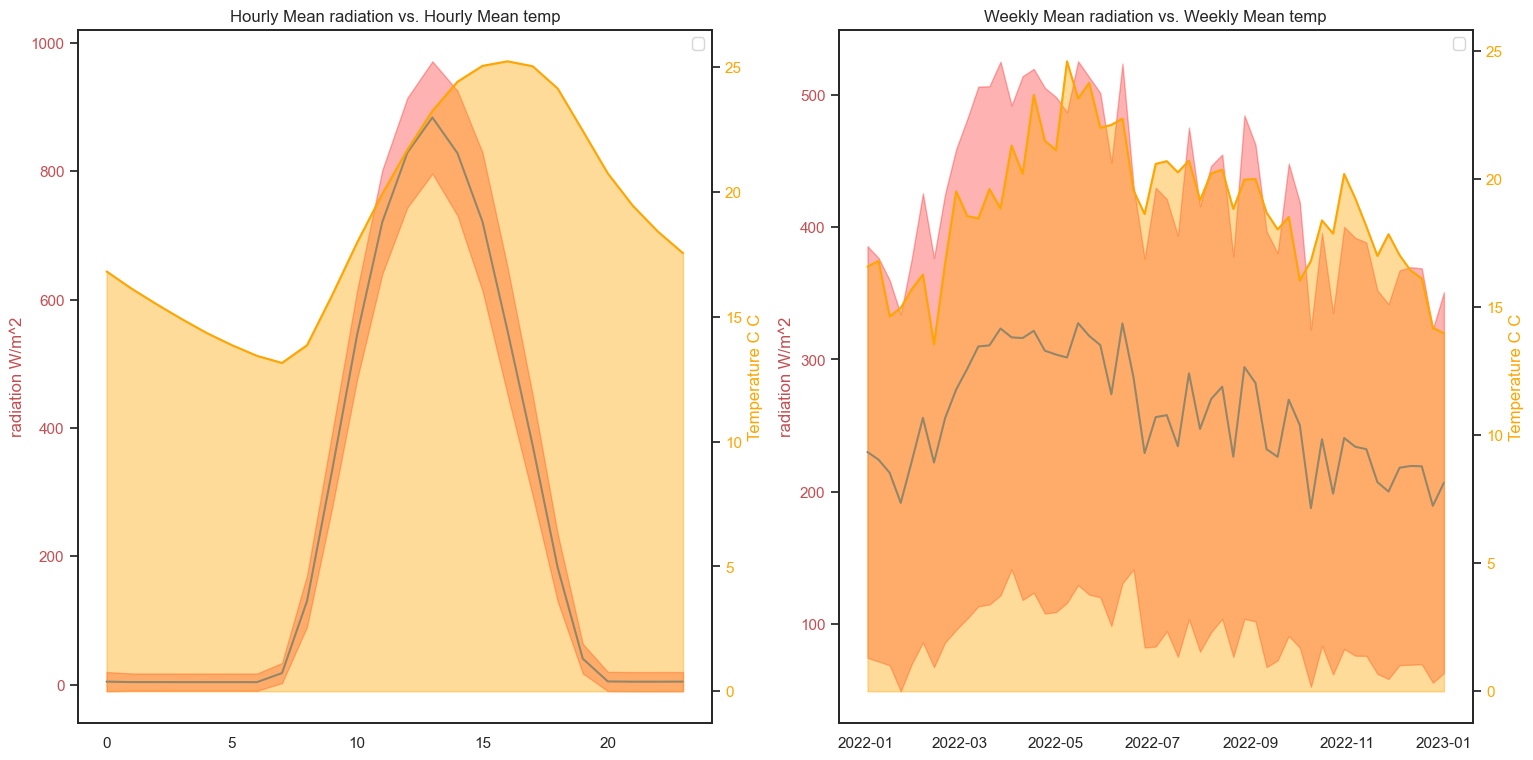

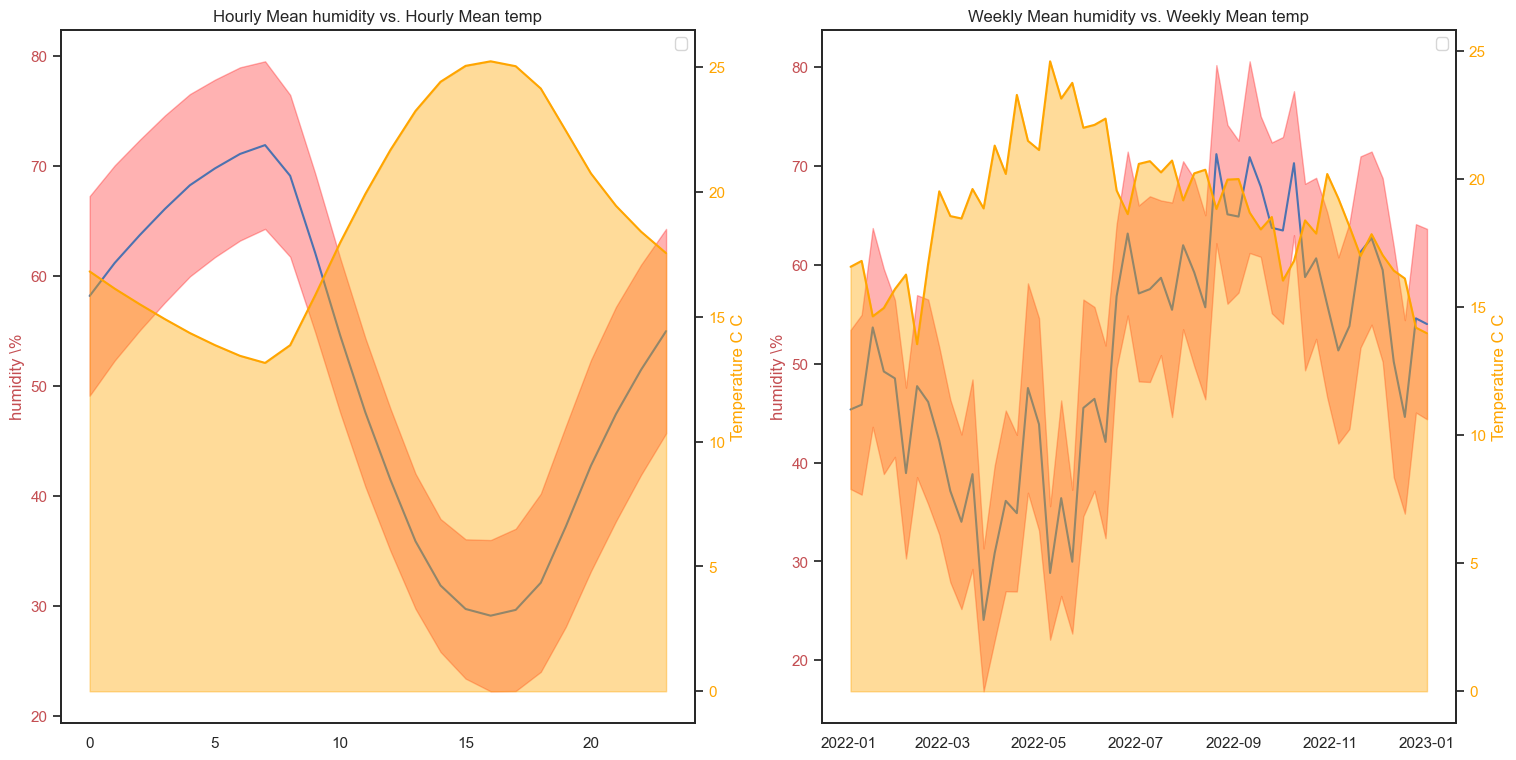

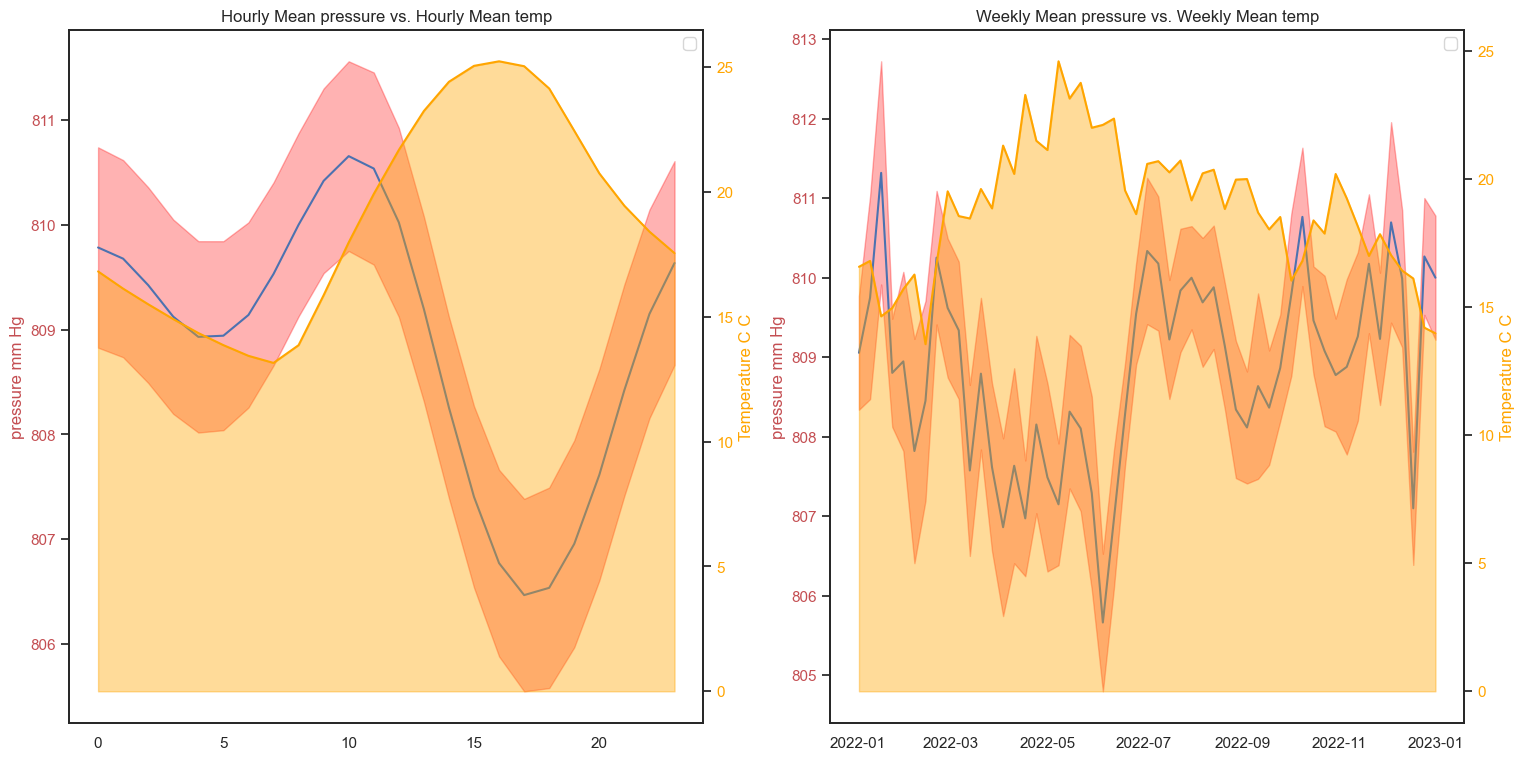

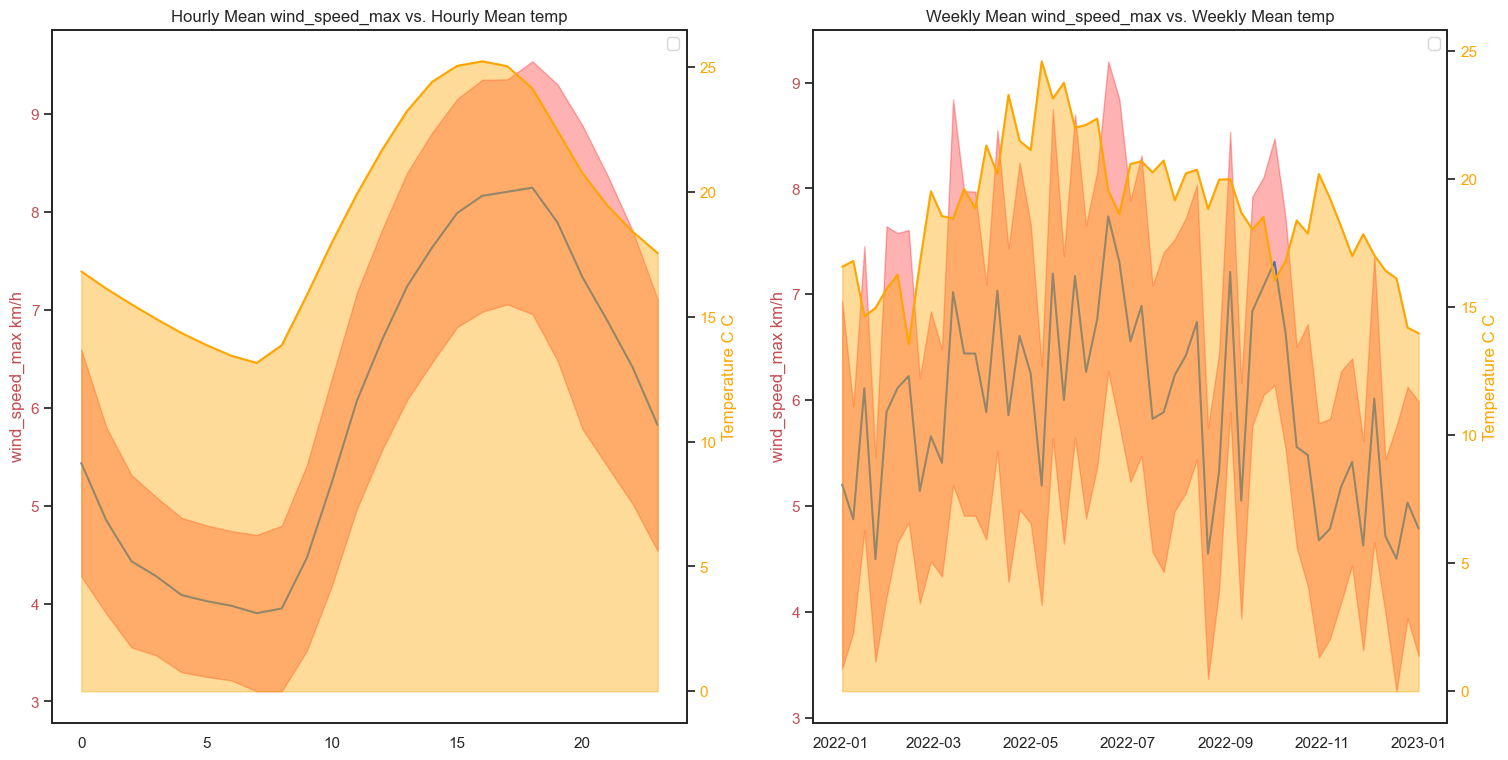

In [16]:
for feature in feature_list[1:]:
 HourlyWeeklyVs(df,feature,feature_list[0],units)
plt.show()

# Training and Testing

An algorithm that predicts temperature for a set of inputs is what we are looking for. We have lots of data to work with. There are many models available, and it is possible to use more than one. We will be reviewing different models and comparing their performance to determine the best method to predict temperature.

* Linear Regression
* Random Forest Regression
* SVR (Support Vector Regression)

First we have to import the machine learning classifiers

In [17]:
from sklearn.linear_model import LinearRegression # Linear regression
from sklearn.ensemble import RandomForestRegressor # random forest regression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.svm import SVR

## Preparation of the algorithm


We can create a prediction algorithm using our data that will take the selected model and make a prediction. Scikit-learn makes it easy to use different models while keeping the same program's high-level structure. We used a split-test/training method to train the algorithm. This was done in order to avoid learning bias. The data is split into randomly selected data points. The training data is used by 80% and validation of the training data by 20%. 
The test data does not necessarily include continuous time but is a random selection from the ensemble. To demonstrate the algorithm's performance over time, we use the entire dataset. This is naturally biased as some points that we will see are points where the algorithm was trained and possibly optimized. 
We validated the accuracy with the subset test points to ensure that we are able to evaluate performance using the accuracy metrics and take into consideration any biases.

In [18]:
x = df.drop('temp',axis=1).values
y = df['temp'].values

In [19]:
print(x)

[[46.23 1.101 2.17 ... 808.37 1.783 52]
 [48.65 1.481 2.32 ... 808.367 2.126 52]
 [52.12 2.21 2.89 ... 808.299 1.82 52]
 ...
 [47.18 1.365 2.15 ... 809.64 1.651 52]
 [53.74 1.39 2.92 ... 810.164 1.673 52]
 [59.11 2.16 3.8 ... 810.302 1.638 52]]


In [20]:
print(y)

[14.95 14.09 13.5  ... 16.72 15.24 14.37]


In [21]:
from sklearn import preprocessing # ML tools
from sklearn.model_selection import train_test_split # split data
from sklearn import metrics
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import export_png

def plot_test(clf,X_test,y_test):
    y_predicted = clf.predict(X_test)

    p = figure(x_range=[0, 100], title='Model Validation', x_axis_label='Range in 100 Hrs.', y_axis_label='Temperature C.')
    p.grid.minor_grid_line_color = '#eeeeee'
    p.line(range(len(y_test)),y_test,legend_label='Actual',line_color='orange')
    p.line(range(len(y_test)),y_predicted,legend_label='Predicted',line_color='red')
    show(p)
    return

def plot_newtest(clf,X_test,y_test):
    y_pred = clf.predict(X_test)
    fig, ax = plt.subplots(figsize=(12,10))
    g1=ax.plot(range(len(y_test)), y_test, '-b')
    g1[0].set_label("Actual")
    g2=ax.plot(range(len(y_pred)), y_pred, 'r')
    g2[0].set_label("Predicted")
    plt.title('Acutal Vs Predicted Plot', fontsize = 20)
    plt.savefig(str(clf)+'TestVsPredictedPlot.pdf',dpi=600)
    plt.show()
    return

def plot_real(clf,x,y_actual,index):

    y_predicted = clf.predict(x)

    p = figure(title='Predicted Data vs Actual Data',y_axis_label='Temperature C.',x_axis_type="datetime")
    p.grid.minor_grid_line_color = '#eeeeee'

    p.line(index,y_actual,legend_label='Actual Temperature C)',line_color='orange')
    p.line(index,y_predicted,legend_label='Predicted Temperature C',line_color='red')
    show(p)
    return

def plot_regression(clf, X_test, y_test):
    y_predicted = clf.predict(X_test)
    plt.figure(figsize=(12, 10))
    sns.regplot(y=y_test, x=y_predicted, scatter_kws={"color": "red", 'alpha': 0.3}, line_kws={"color": "orange"})
    plt.xlabel('Predicted Temperature C', fontsize=26)
    plt.ylabel('Actual Temperature C', fontsize=26)
    plt.title(str(clf)+'Regression Plot', fontsize=28)
    plt.show()
    return

def train_model(X,y,clf,debug=False):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = clf.fit(X_train,y_train)
    accuracy = clf.score(X_test,y_test)
    return clf, model, accuracy, X_test, y_test

def go(x,y,algorithm,debug=True):

    clf, model, accuracy, X_test, y_test=train_model(x,y,algorithm,debug=True)
    y_pred = clf.predict(X_test)
    print(y_test)
    print(y_pred)
    print(model)
    print(clf)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Mean absolute percentage error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
    print('metrics.r2_score;', metrics.r2_score(y_test, y_pred))
    print('Precisión: %s Percentage'%str(accuracy*100))
 
    if debug:
        plot_regression(clf,X_test,y_test)
        plot_test(clf,X_test,y_test)
    return

## Linar Regression

[10.57  9.44 21.79 ...  4.81 28.29 15.3 ]
[12.26225845 17.40677495 22.07862054 ... 13.24779521 29.52949671
 19.81306217]
LinearRegression()
LinearRegression()
Mean Absolute Error: 2.157991250960404
Mean Squared Error: 7.439118138898885
Root Mean Squared Error: 2.7274746816238067
Mean absolute percentage error: 0.13846384002266773
metrics.r2_score; 0.7371521730250161
Precisión: 73.71521730250161 Percentage


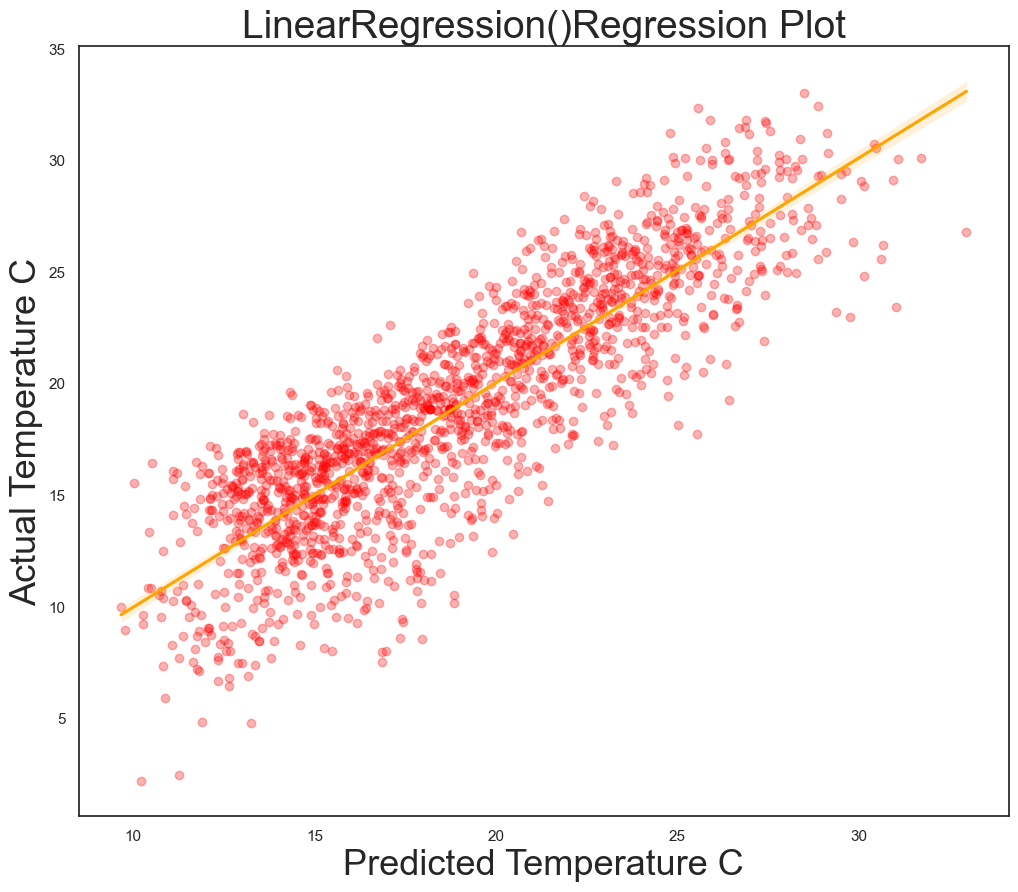

In [25]:
go(x,y,LinearRegression())

## Random Forest

[15.31 29.37 11.51 ... 14.99 18.26  8.48]
[16.6713 28.9407  8.9328 ... 16.4754 15.2241 11.0029]
RandomForestRegressor()
RandomForestRegressor()
Mean Absolute Error: 1.0100720428953318
Mean Squared Error: 1.8800619908659955
Root Mean Squared Error: 1.3711535256367156
Mean absolute percentage error: 0.06353115660886366
metrics.r2_score; 0.9353581874597071
Precisión: 93.53581874597072 Percentage


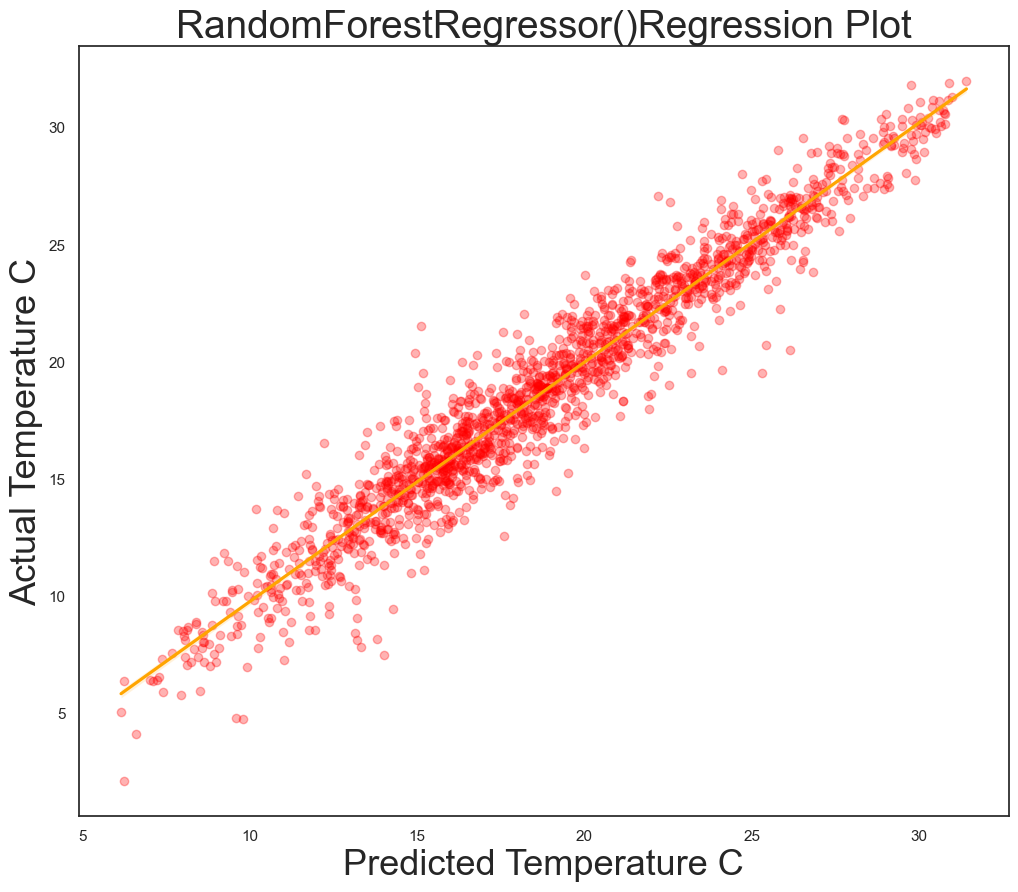

In [26]:
go(x,y,RandomForestRegressor())

## Support Vector Regression (SVR)

[24.91 16.13 23.84 ... 20.62 29.9  11.58]
[22.75759205 15.95871351 24.36759821 ... 17.76964966 23.65102818
 19.16188385]
SVR()
SVR()
Mean Absolute Error: 2.6004086802129542
Mean Squared Error: 11.258748777659907
Root Mean Squared Error: 3.355405903562177
Mean absolute percentage error: 0.1649346343562059
metrics.r2_score; 0.588385335438847
Precisión: 58.838533543884694 Percentage


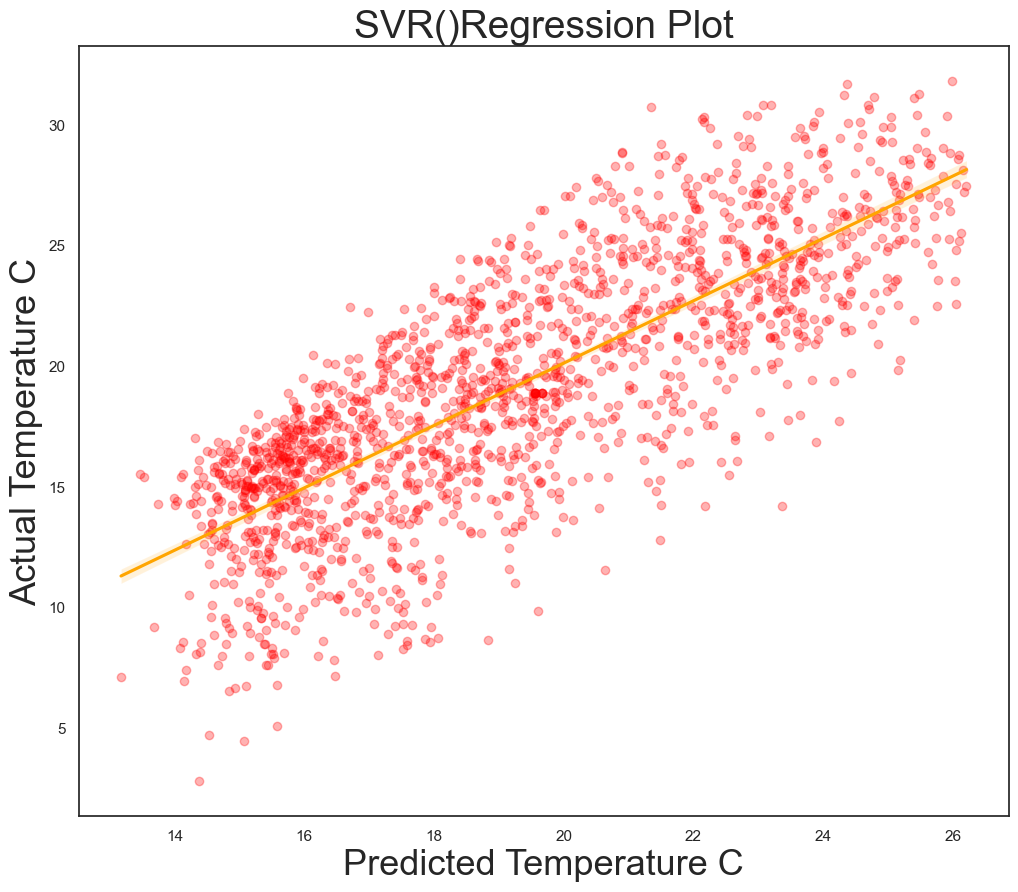

In [27]:
  go(x,y,SVR())